In [4]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import scanpy as sc

import os.path as osp
import os
from PIL import Image

import anndata as ad
import pandas as pd
import sys

import eggplant as eg



## MOB

In [5]:
MOB_PTH = "../../data/science-mob/charted/Rep10_MOB.h5ad"

In [6]:
adata = ad.read_h5ad(MOB_PTH)

In [10]:
res = eg.fun.estimate_n_lanmdarks(dict(Rep10_MOB= adata),
                                  n_max_lmks=18,
                                  subsample = None,
                                  n_epochs=1000,
                                  n_evals=15,
                                  device="gpu",
                                  verbose = True,
                                 kneedle_s_param=2,
                                 )

[Processing] :: Sample : Rep10_MOB (1/1)


Eval. 18 lmks :: 100%|██████████| 1000/1000 [00:06<00:00, 148.29it/s]


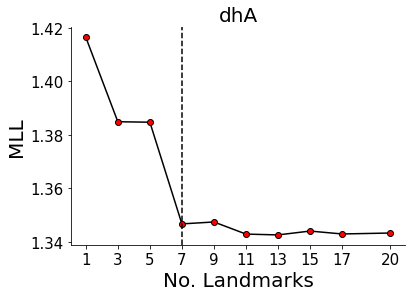

In [14]:
eg.pl.landmark_diagnostics(res)
fig.savefig("/tmp/hej.png")

In [12]:
#HEART_PTH = "../../data/developmental-heart/w_10/anndata/V10F24-105_A1.h5ad"
#adata = ad.read_h5ad(MOB_PTH)
#res = eg.fun.estimate_n_lanmdarks(dict(dhA= adata),
#                                  n_max_lmks=20,
#                                  subsample = None,
#                                  n_epochs=1000,
#                                  n_evals=10,
#                                  device="gpu",
#                                  verbose = True,
#                                  kneedle_s_param=1,
#                                 )

[Processing] :: Sample : dhA (1/1)


Eval. 20 lmks :: 100%|██████████| 1000/1000 [00:06<00:00, 155.02it/s]


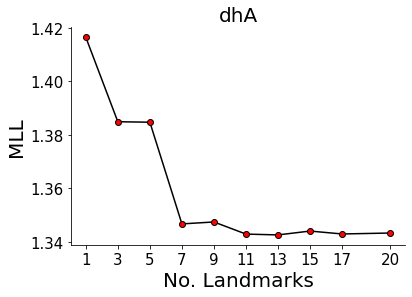

In [8]:
fig,ax = eg.pl.landmark_diagnostics(res,return_figure=True)

In [22]:
kneedle = kneed.KneeLocator(res[0],
                            res[1]["dhA"],
                            S=1,
                            direction = "decreasing",
                            curve = "convex")
kneedle.knee

7

In [11]:
adata.uns["curated_landmarks"].shape

(14, 2)